# Injection Moulding and Tensile Testing
Injection moulding is a polymer shaping process that involves injecting a heated, molten polymer under high pressure into a mould cavity where it takes shape and solidifies before being ejected.

In this lab, you produced two injection moulded dogbone specimens:
- Single gate tensile test
- Double gate tensile test

Then these were tested in the Instron tensile testing machine to determine the tensile properties of the material.

The tensile properties of a material are important for understanding how it will behave in a range of applications. The tensile properties of a material are determined by the molecular structure of the polymer, the processing conditions used to produce the material, and the test conditions used to measure the properties.

You can also find the video on the tensile test [here](https://youtu.be/BkNf2svhjV0).

## Procedure

In this notebook, we will:
- Load the data from the tensile tests as a pandas DataFrame
- Plot the stress-strain curves for the two specimens
- Calculate the tensile properties of the material
- Compare the tensile properties of the two specimens

Let's get started!

### 0. Import the Required Libraries
Like the other labs, we will start by importing the required libraries for data analysis (`pandas`, `numpy`) and visualization (`matplotlib`).

In [1]:
# Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Load the Data
First, we need to load the data from the tensile tests. The data is stored in a csv file that contains the raw data from the tensile tests, including the load and displacement values recorded during the test.
Make sure to replace the file name with the name of the csv file containing the data from your tensile tests.
Your file should contain the following columns:
- Time (s): the time in seconds since the test started
- Extension (mm): the extension of the specimen in mm
- Load (N): the load applied to the specimen in N

Delete any rows in the csv file that contain text or other information that is not part of the raw data from the tensile test.
Let's load the data and take a look at the first few rows.

In [2]:
# Load the data from the tensile tests
# Load the csv file into a pandas DataFrame
file_name_single = 'Specimen_RawData_single.csv' # your file name here
# start reading from the 4th row
single_gate = pd.read_csv(file_name_single, skiprows=4) # you might need to adjust the number of rows to skip
single_gate.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Specimen_RawData_single.csv'

### 2. Plotting the Raw Data
Let's plot the raw data to plot the load vs extension curve.

Text(0.5, 1.0, 'Load vs Extension Curve')

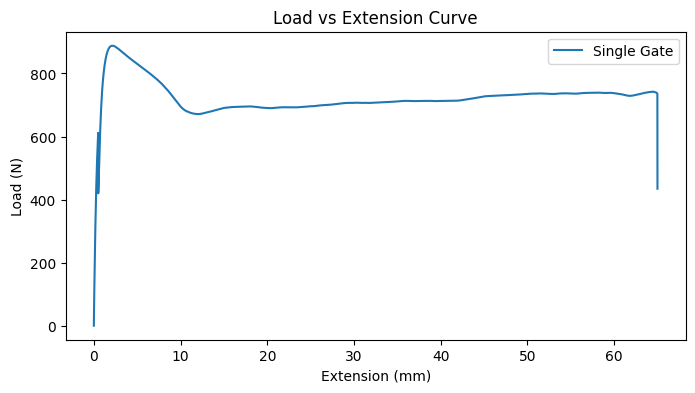

In [3]:
# Plot the raw data
plt.figure(figsize=(8, 4))
plt.plot(single_gate['Extension'], single_gate['Load'], label='Single Gate')
plt.xlabel('Extension (mm)')
plt.ylabel('Load (N)')
plt.legend()
plt.title('Load vs Extension Curve')


### 3. Calculate and Plot the Stress-Strain Data
However the raw data is not very useful for analysis. We need to calculate the stress and strain values from the raw data to plot the stress-strain curve.

The *engineering stress* is calculated as the load divided by the original cross-sectional area of the specimen, and the *engineering strain* is calculated as the extension divided by the original length of the specimen.

You will need to input the following values:
- Gauge length of the specimen (mm)
- Original width of the specimen (mm)
- Original thickness of the specimen (mm)

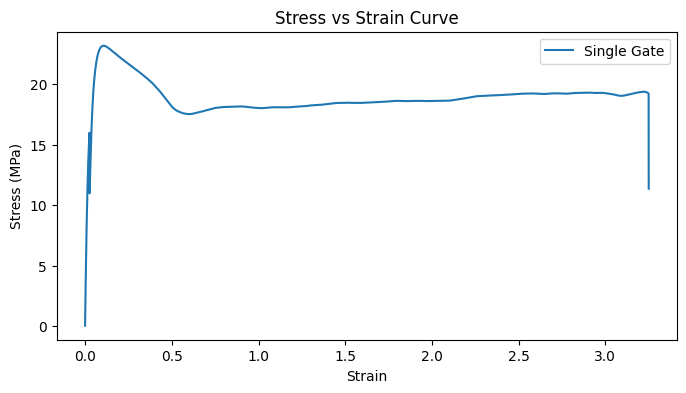

In [4]:
# Input the values for the gauge length, width and thickness of the specimen
sg_gauge_length = 20 # mm
sg_width = 12 # mm
sg_thickness = 3.19 # mm
sg_cross_sectional_area = sg_width * sg_thickness

# Calculate the engineering stress and strain
single_gate['Engineering Stress'] = single_gate['Load'] / sg_cross_sectional_area
single_gate['Engineering Strain'] = single_gate['Extension'] / sg_gauge_length

# Plot the stress-strain curve
plt.figure(figsize=(8, 4))
plt.plot(single_gate['Engineering Strain'], single_gate['Engineering Stress'], label='Single Gate')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)') # pay attention to the units
plt.legend()
plt.title('Stress vs Strain Curve')
plt.show()

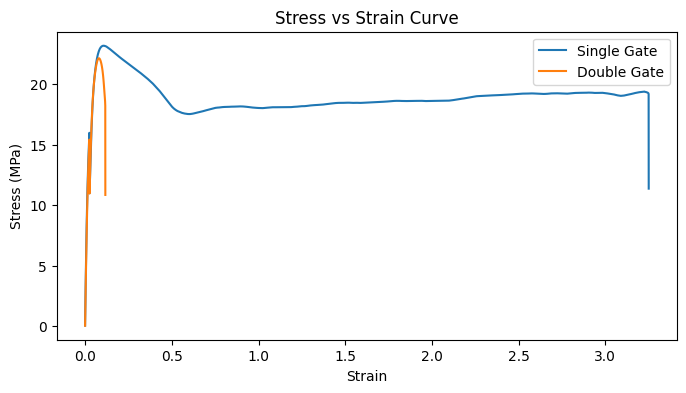

In [5]:
# Load the data from the tensile tests for the second specimen
file_name_double = 'Specimen_RawData_double.csv' # your file name here
# start reading from the 4th row
double_gate = pd.read_csv(file_name_double, skiprows=4)
# Input the values for the gauge length, width and thickness of the specimen
dg_gauge_length = 20 # mm
dg_width = 12 # mm
dg_thickness = 3.19 # mm
dg_cross_sectional_area = dg_width * dg_thickness

# Calculate the engineering stress and strain
double_gate['Engineering Stress'] = double_gate['Load'] / dg_cross_sectional_area
double_gate['Engineering Strain'] = double_gate['Extension'] / dg_gauge_length

# Plot the stress-strain curve for both specimens
plt.figure(figsize=(8, 4))
plt.plot(single_gate['Engineering Strain'], single_gate['Engineering Stress'], label='Single Gate')
plt.plot(double_gate['Engineering Strain'], double_gate['Engineering Stress'], label='Double Gate')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.title('Stress vs Strain Curve')
plt.show()

### 4. Calculate the Tensile Properties
Now let's calculate the tensile properties of the material from the stress-strain curve.

The tensile properties we will calculate are:
- The *Young's Modulus* is the slope of the stress-strain curve in the elastic region, and it represents the stiffness of the material.
- The *Yield Strength* is the stress at which the material starts to deform plastically. We will use the 0.2% offset method to calculate the yield strength as the transition point from elastic to plastic deformation is not always clear.
- The *Ultimate Tensile Strength* is the maximum stress that the material can withstand before it breaks.

We will calculate these properties for both the single gate and double gate specimens and compare them.

#### 4.1 Define a Function to Calculate the Tensile Properties
Let's define a function to calculate the tensile properties of the material from the stress-strain curve. Functions are a way to encapsulate code that performs a specific task, making it easier to reuse and maintain. The function will take the stress-strain data as input and return the Young's Modulus, Yield Strength, and Ultimate Tensile Strength.

In [6]:
# Calculate the tensile properties of the material
# Let us define a function to calculate the tensile properties
def linear_fit_through_origin(x, y):
    # Fit a line through the origin (intercept = 0) using linear algebra
    A = np.vstack([x, np.zeros_like(x)]).T
    slope, _ = np.linalg.lstsq(A, y, rcond=None)[0] # uses a least-squares fit to find the slope
    return slope

def calculate_tensile_properties(data):
    # Calculate the Young's Modulus
    # Fit a linear regression model to the elastic region of the stress-strain curve
    elastic_region = data[data['Engineering Strain'] < 0.02] # the strain value should be adjusted based on the data
    # force the line to pass through the origin
    slope = linear_fit_through_origin(elastic_region['Engineering Strain'], elastic_region['Engineering Stress'])
    youngs_modulus = slope

    # Calculate the Yield Strength
    # The yield strength is the stress at which the material starts to deform plastically (0.2% offset method)
    # Find the intersection point of the stress-strain curve with a line parallel to the linear elastic region
    offset = 0.002
    offset_line = slope * (data['Engineering Strain'] - offset)
    yield_strength = data.loc[(np.abs(data['Engineering Stress'] - offset_line)).idxmin()]['Engineering Stress'] # idxmin() returns the index of the minimum value

    # Calculate the Ultimate Tensile Strength
    ultimate_tensile_strength = data['Engineering Stress'].max()

    return youngs_modulus, yield_strength, ultimate_tensile_strength

#### 4.2 Use the `calculate_tensile_properties` Function to Calculate the Tensile Properties

In [7]:
# Calculate the tensile properties for the single gate specimen
sg_youngs_modulus, sg_yield_strength, sg_ultimate_tensile_strength = calculate_tensile_properties(single_gate)
# Print the tensile properties
print('Single Gate Specimen:')
print('Young\'s Modulus:', sg_youngs_modulus, 'MPa')
print('Yield Strength:', sg_yield_strength, 'MPa')
print('Ultimate Tensile Strength:', sg_ultimate_tensile_strength, 'MPa')

Single Gate Specimen:
Young's Modulus: 808.0173008033751 MPa
Yield Strength: 14.070024033437825 MPa
Ultimate Tensile Strength: 23.194457941483805 MPa


#### 4.3 Plot the Tensile Properties on the Stress-Strain Curve

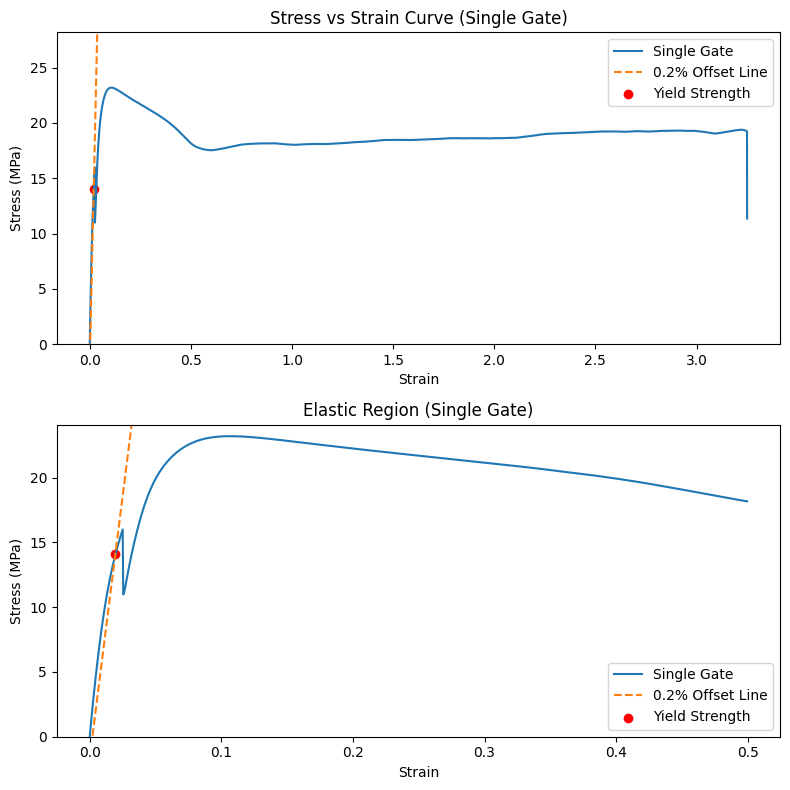

In [8]:
# Plot these values on the stress-strain curve
# add a column for the offset line in the linear region
single_gate['Offset Line'] = sg_youngs_modulus * (single_gate['Engineering Strain']-0.002)
strain_at_yield = single_gate.loc[(np.abs(single_gate['Engineering Stress'] - sg_yield_strength)).idxmin()]['Engineering Strain']
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(single_gate['Engineering Strain'], single_gate['Engineering Stress'], label='Single Gate')
axs[0].plot(single_gate['Engineering Strain'], single_gate['Offset Line'], label='0.2% Offset Line', linestyle='--')
axs[0].scatter(strain_at_yield, sg_yield_strength, color='red', label='Yield Strength')
axs[0].set_xlabel('Strain')
axs[0].set_ylabel('Stress (MPa)')
axs[0].legend()
axs[0].set_ylim(0, sg_ultimate_tensile_strength+5)
axs[0].set_title('Stress vs Strain Curve (Single Gate)')

# Zoom in on the elastic region
elastic_region = single_gate[single_gate['Engineering Strain'] < 0.5]
axs[1].plot(elastic_region['Engineering Strain'], elastic_region['Engineering Stress'], label='Single Gate')
axs[1].plot(elastic_region['Engineering Strain'], elastic_region['Offset Line'], label='0.2% Offset Line', linestyle='--')
# find the strain at the yield strength

axs[1].scatter(strain_at_yield, sg_yield_strength, color='red', label='Yield Strength')
axs[1].set_xlabel('Strain')
axs[1].set_ylabel('Stress (MPa)')
axs[1].legend()
axs[1].set_ylim(0, sg_yield_strength+10)
axs[1].set_title('Elastic Region (Single Gate)')
plt.tight_layout()
plt.show()


In [9]:
# Calculate the tensile properties for the double gate specimen
dg_youngs_modulus, dg_yield_strength, dg_ultimate_tensile_strength = calculate_tensile_properties(double_gate)
# Print the tensile properties
print('Double Gate Specimen:')
print('Young\'s Modulus:', dg_youngs_modulus, 'MPa')
print('Yield Strength:', dg_yield_strength, 'MPa')
print('Ultimate Tensile Strength:', dg_ultimate_tensile_strength, 'MPa')

Double Gate Specimen:
Young's Modulus: 758.8634052019555 MPa
Yield Strength: 13.76214420062696 MPa
Ultimate Tensile Strength: 22.155556165099267 MPa


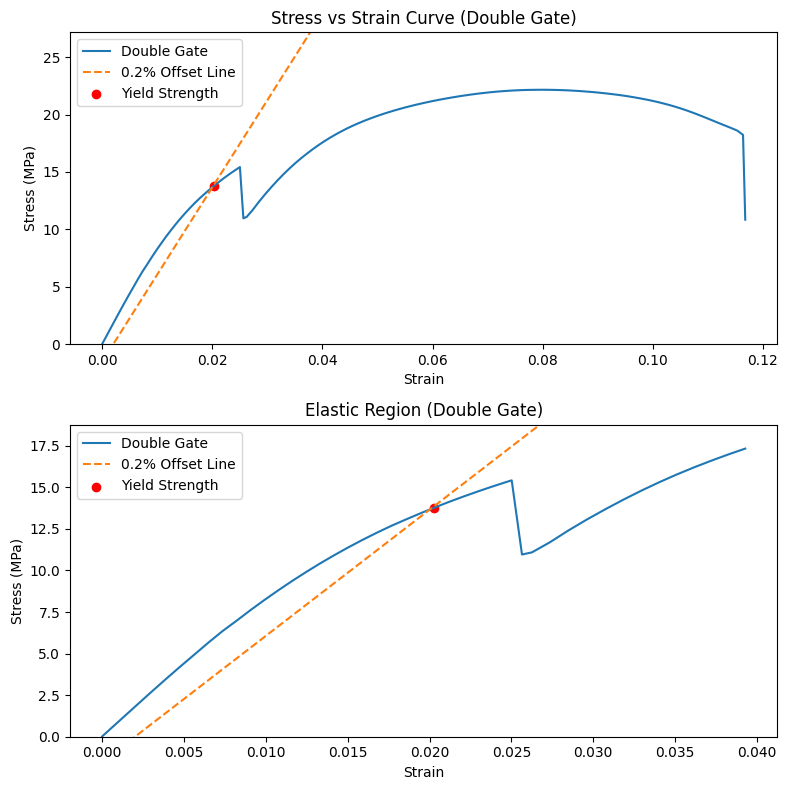

In [10]:
# Plot these values on the stress-strain curve
# add a column for the offset line in the linear region
double_gate['Offset Line'] = dg_youngs_modulus * (double_gate['Engineering Strain']-0.002)
strain_at_yield = double_gate.loc[(np.abs(double_gate['Engineering Stress'] - dg_yield_strength)).idxmin()]['Engineering Strain']
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(double_gate['Engineering Strain'], double_gate['Engineering Stress'], label='Double Gate')
axs[0].plot(double_gate['Engineering Strain'], double_gate['Offset Line'], label='0.2% Offset Line', linestyle='--')
axs[0].scatter(strain_at_yield, dg_yield_strength, color='red', label='Yield Strength')
axs[0].set_xlabel('Strain')
axs[0].set_ylabel('Stress (MPa)')
axs[0].legend()
axs[0].set_ylim(0, dg_ultimate_tensile_strength+5)
axs[0].set_title('Stress vs Strain Curve (Double Gate)')
# Zoom in on the elastic region
elastic_region = double_gate[double_gate['Engineering Strain'] < 0.04]
axs[1].plot(elastic_region['Engineering Strain'], elastic_region['Engineering Stress'], label='Double Gate')
axs[1].plot(elastic_region['Engineering Strain'], elastic_region['Offset Line'], label='0.2% Offset Line', linestyle='--')
# find the strain at the yield strength
axs[1].scatter(strain_at_yield, dg_yield_strength, color='red', label='Yield Strength')
axs[1].set_xlabel('Strain')
axs[1].set_ylabel('Stress (MPa)')
axs[1].legend()
axs[1].set_ylim(0, dg_yield_strength+5)
axs[1].set_title('Elastic Region (Double Gate)')
plt.tight_layout()
plt.show()

### 5. Compare the Tensile Properties
Now that we have calculated the tensile properties for both the single gate and double gate specimens, let's compare them.

In [11]:
# Compare the tensile properties of the two specimens
# Create a DataFrame to store the tensile properties
tensile_properties = pd.DataFrame({
    'Specimen': ['Single Gate', 'Double Gate'],
    'Young\'s Modulus (MPa)': [sg_youngs_modulus, dg_youngs_modulus],
    'Yield Strength (MPa)': [sg_yield_strength, dg_yield_strength],
    'Ultimate Tensile Strength (MPa)': [sg_ultimate_tensile_strength, dg_ultimate_tensile_strength]
})
tensile_properties

,Specimen,Young's Modulus (MPa),Yield Strength (MPa),Ultimate Tensile Strength (MPa)
0,Single Gate,808.017301,14.070024,23.194458
1,Double Gate,758.863405,13.762144,22.155556


The tensile properties of the single gate and double gate specimens are shown in the table above. These properties are pretty close to each other, indicating that the two specimens have similar mechanical properties. This is expected as the two specimens were produced using the same material.

```{admonition} Think about it!
The strain at the break is different for the two specimens. Why is that? How does the gate design affect the strain at the break?
```

In [12]:
# Calculate the strain at the break for the two specimens
sg_strain_at_break = single_gate['Engineering Strain'].max()
dg_strain_at_break = double_gate['Engineering Strain'].max()
print('Strain at Break (Single Gate):', sg_strain_at_break)
print('Strain at Break (Double Gate):', dg_strain_at_break)

Strain at Break (Single Gate): 3.250094
Strain at Break (Double Gate): 0.116807


## Summary
- We loaded the data from the tensile tests as a pandas DataFrame and plotted the stress-strain curves for the two specimens.
- We calculated the tensile properties of the material, including the Young's Modulus, Yield Strength, and Ultimate Tensile Strength, for both specimens.
- We compared the tensile properties of the two specimens and found that they are similar.
- We also calculated the strain at the break for the two specimens and found that it is different.